# Jyro Python Robot Simulator

## Pure-Python simulator for robots.

In [29]:
from jyro.simulator import (Pioneer, Simulator, Camera,
                            PioneerFrontSonars, Gripper,
                            PioneerFrontLightSensors, Color)
import math

In [30]:
sim = Simulator()

In [31]:
sim.addBox(0, 0, 10, 10, fill="white", wallcolor="grey") # meters
sim.addBox(1, 1, 2, 2, "purple")
sim.addBox(7, 7, 8, 8, "purple")
## brightness of 1 is radius 1 meter
sim.addLight(7, 7, 4.25, color=Color(255, 255, 0, 64))

In [32]:
robot = Pioneer("Pioneer", 5.00, 5.00, math.pi / 2) # meters, radians
robot.addDevice(PioneerFrontSonars(maxRange=4.0))
robot.addDevice(Gripper())
robot.addDevice(PioneerFrontLightSensors())
sim.addRobot(robot)

In [33]:
from jyro.simulator.svgcanvas import SVGCanvas

canvas = SVGCanvas((250, 250))

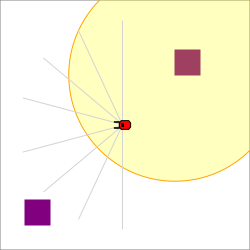

In [34]:
sim.draw(canvas)

In [35]:
sim["Pioneer"].getPose()

(5.0, 5.0, 1.5707963267948966)

In [36]:
sim["Pioneer"].move(1, 1)

In [37]:
from IPython.display import display, clear_output

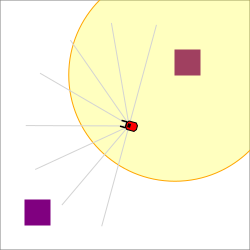

In [38]:
for i in range(500):
    sim.step()
    for r in sim.robots:
        sim.draw(canvas)
        clear_output(wait=True)
        display(canvas)

In [39]:
%%time

import numpy

light0 = numpy.zeros((100,100))
light1 = numpy.zeros((100,100))

for i in range(500):
    sim.step()
    for r in sim.robots:
        light0[int(r._gx/10 * 100), int(r._gy/10 * 100)] = r.device["light"].scan[0]        
        light1[int(r._gx/10 * 100), int(r._gy/10 * 100)] = r.device["light"].scan[1]

CPU times: user 568 ms, sys: 0 ns, total: 568 ms
Wall time: 566 ms


500 steps * 0.1 seconds/step = 50 seconds

50 seconds / 0.596

In [40]:
50 / 0.596

83.89261744966443

Looks like it simulates about 83 seconds for every real second, or is 83 times faster.

## Checking Light Readings

New simulated light sensors are 75% direct light and 25% ambient light.

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

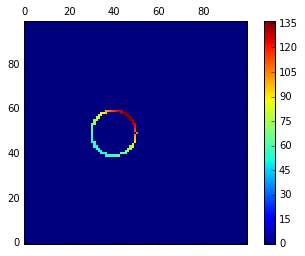

In [42]:
fig1 = plt.figure()
sp0 = fig1.add_subplot(111)
p0 = sp0.matshow(light0, origin="lower")
fig1.colorbar(p0)

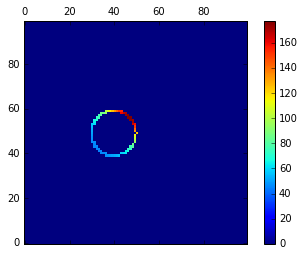

In [43]:
fig2 = plt.figure()
sp1 = fig2.add_subplot(111)
p1 = sp1.matshow(light1, origin="lower")
fig2.colorbar(p1)

## Differences between two light sensors

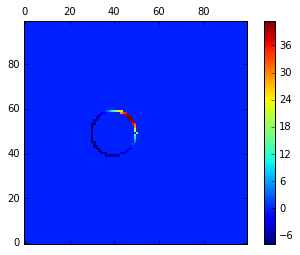

In [44]:
fig3 = plt.figure()
sp3 = fig3.add_subplot(111)
p3 = sp3.matshow(light1 - light0, origin="lower")
fig3.colorbar(p3)

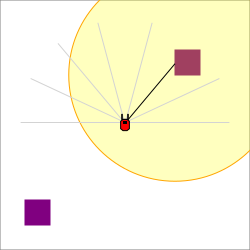

In [45]:
robot.setPose(5, 5, 0)
sim.draw(canvas)

In [46]:
def sampleLight(angle, resolution=50):
    light0 = numpy.zeros((resolution,resolution))
    light1 = numpy.zeros((resolution,resolution))

    for x in range(resolution):
        for y in range(resolution):
            for r in sim.robots:
                r.setPose(x/resolution * 10, 
                          y/resolution * 10, 
                          angle) 
                light0[x, y] = r.device["light"].scan[0]        
                light1[x, y] = r.device["light"].scan[1]
    fig = plt.figure()
    sp = fig.add_subplot(111)
    p = sp.matshow(light0, origin="lower")
    fig.colorbar(p)

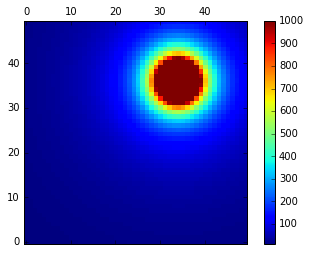

In [47]:
sampleLight(0) # face up, north

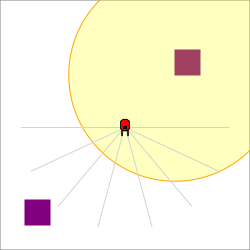

In [48]:
robot.setPose(5, 5, math.pi)
sim.draw(canvas)

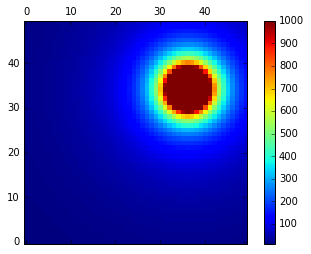

In [50]:
sampleLight(math.pi)

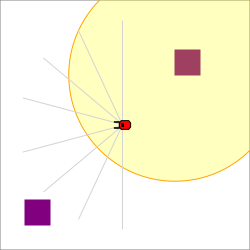

In [24]:
robot.setPose(5, 5, math.pi/2)
sim.draw(canvas)

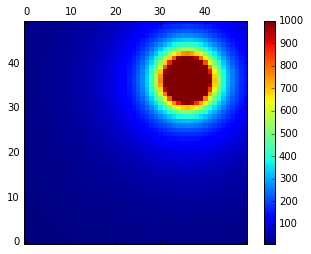

In [51]:
sampleLight(math.pi/2)

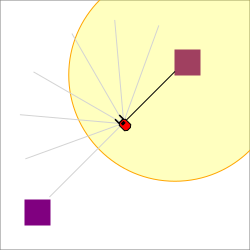

In [52]:
robot.setPose(5, 5, math.pi/4)
sim.draw(canvas)

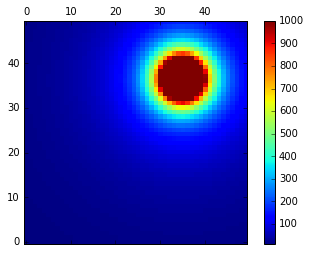

In [53]:
sampleLight(math.pi/4)

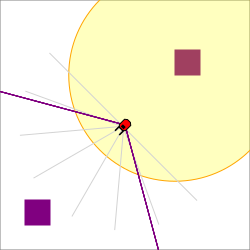

In [48]:
robot.setPose(5, 5, math.pi * 3/4)
sim.draw(canvas)

In [49]:
robot.addDevice(Camera(120, 80))

In [50]:
robot.updateDevices()

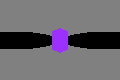

In [51]:
robot.device["camera"].getData()

In [52]:
robot.move(0, .5)
for i in range(10):
    sim.step()

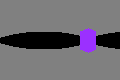

In [53]:
robot.device["camera"].getData()

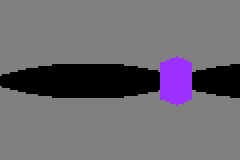

In [54]:
import PIL
img = robot.device["camera"].getData()
img = img.resize((240, 160))
img